# Practical 1 - Haiwen Huang

In [4]:
import _pickle as cp
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# load data
X, y = cp.load(open('winequality-white.pickle', 'rb'))

In [6]:
# construct train and test split
N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train
X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

## Handin 1 -- Understanding what we're predicting

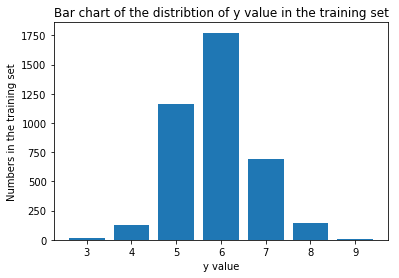

In [7]:
dist_y = {}
for y in y_train:
    dist_y[y] = 1 + dist_y.get(y, 0)
plt.bar(dist_y.keys(), dist_y.values())
plt.xlabel('y value')
plt.ylabel('Numbers in the training set')
plt.title('Bar chart of the distribtion of y value in the training set')
plt.savefig('./y_dist.png')

## Handin 2

In [8]:
simplest_predictor = np.mean(y_train)

In [9]:
def mse_error(y_true, y_pred):
    """
    y_true is numpy arrays of shape (n,)
    """
    return ((y_true - y_pred)**2).mean()

In [10]:
train_mse = mse_error(y_train, simplest_predictor)
test_mse = mse_error(y_test, simplest_predictor)
print(f'Training data MSE error: {train_mse}')
print(f'Test data MSE error: {test_mse}')

Training data MSE error: 0.7767772386501117
Test data MSE error: 0.8138573000045535


## Handin 3 -- Linear Model using Least Squares

In [11]:
mean = np.mean(X_train, axis=0, keepdims=True)
std = np.std(X_train, axis=0, keepdims=True)

In [12]:
X_train_ = (X_train - mean) / std
X_test_ = (X_test - mean) / std
X_train_ = np.concatenate(( np.ones((len(X_train_),1)), X_train_), axis=1)
X_test_ = np.concatenate(( np.ones((len(X_test_),1)), X_test_), axis=1)

In [13]:
w_close = np.matmul( np.linalg.inv(np.matmul(X_train_.transpose(), X_train_)), X_train_.transpose()) @ y_train 

In [14]:
train_mse = mse_error(y_train, X_train_ @ w_close)
test_mse = mse_error(y_test, X_test_ @ w_close)
print(f'Training data MSE error: {train_mse}')
print(f'Test data MSE error: {test_mse}')

Training data MSE error: 0.5639996173941924
Test data MSE error: 0.5607292042283472


## Handin 4 - Learning Curves

In [15]:
def results_on_partial_data(train_X, train_y, test_X, test_y, train_num):
    w_close = np.matmul( np.linalg.inv(np.matmul(train_X.transpose(), train_X)), train_X.transpose()) @ train_y
    train_mse = mse_error(train_y, train_X @ w_close)
    test_mse = mse_error(test_y, test_X @ w_close)
    return train_mse, test_mse


In [16]:
TRAIN_ERR = []
TEST_ERR = []
num = 20
for i in range(30):
    train_mse, test_mse = results_on_partial_data(X_train_[:num], y_train[:num], X_test_, y_test, num)
    TRAIN_ERR.append(train_mse)
    TEST_ERR.append(test_mse)
    num += 20


Text(0.5, 1.0, 'Learning curves')

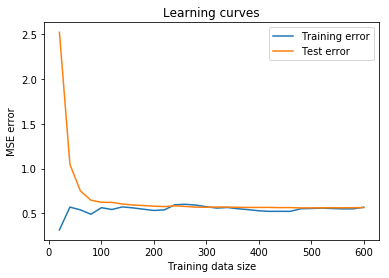

In [17]:
plt.plot(range(20, 620, 20), TRAIN_ERR)
plt.plot(range(20, 620, 20), TEST_ERR)
plt.legend(['Training error', 'Test error'])
plt.xlabel('Training data size')
plt.ylabel('MSE error')
plt.title('Learning curves')

## (Optional) Polynomial Basis Expansion with Ridge and Lasso

In [19]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

In [20]:
lambdas = [1e-2, 1e-1, 1, 1e1, 1e2]

In [21]:
valid_num = int(0.2*len(X_train_))
X_train__, X_valid = X_train_[:-valid_num], X_train_[-valid_num:]
y_train__, y_valid = y_train[:-valid_num], y_train[-valid_num:]

In [22]:
for alpha in lambdas:
    clf = make_pipeline(PolynomialFeatures(2), StandardScaler(), Ridge(alpha))
    clf.fit(X_train__, y_train__)
    mse = mse_error(y_valid, clf.predict(X_valid))
    print(f'Lambda:{alpha}, MSE: {mse}')
# Best lambda for Ridge: 1.0

Lambda:0.01, MSE: 0.5289937527570151
Lambda:0.1, MSE: 0.5282466246148938
Lambda:1, MSE: 0.5263994550317133
Lambda:10.0, MSE: 0.5264758288007079
Lambda:100.0, MSE: 0.5345036225161255


In [23]:
for alpha in lambdas:
    clf = make_pipeline(PolynomialFeatures(2), StandardScaler(), Lasso(alpha))
    clf.fit(X_train__, y_train__)
    mse = mse_error(y_valid, clf.predict(X_valid))
    print(f'Lambda:{alpha}, MSE: {mse}')
# best lambda for Lasso: 0.01

Lambda:0.01, MSE: 0.5515465637684552
Lambda:0.1, MSE: 0.6341087198730287
Lambda:1, MSE: 0.7899666135736263
Lambda:10.0, MSE: 0.7899666135736263
Lambda:100.0, MSE: 0.7899666135736263


In [24]:
ridge_clf = make_pipeline(PolynomialFeatures(2), StandardScaler(), Ridge(1))
ridge_clf.fit(X_train_, y_train)

train_mse = mse_error(y_train, ridge_clf.predict(X_train_))
test_mse = mse_error(y_test, ridge_clf.predict(X_test_))
print(f'Training data MSE error: {train_mse}')
print(f'Test data MSE error: {test_mse}')

Training data MSE error: 0.49522712137766345
Test data MSE error: 0.5125526298405203


In [25]:
lasso_clf = make_pipeline(PolynomialFeatures(2), StandardScaler(), Lasso(0.01))
lasso_clf.fit(X_train_, y_train)
train_mse = mse_error(y_train, lasso_clf.predict(X_train_))
test_mse = mse_error(y_test, lasso_clf.predict(X_test_))
print(f'Training data MSE error: {train_mse}')
print(f'Test data MSE error: {test_mse}')

Training data MSE error: 0.5179320126861976
Test data MSE error: 0.5267627532553366


## Larger Degrees

In [26]:
from sklearn.linear_model import RidgeCV, LassoCV

In [27]:
ridgecv_clf = make_pipeline(PolynomialFeatures(3), StandardScaler(), RidgeCV(cv=5))
ridgecv_clf.fit(X_train_, y_train)

train_mse = mse_error(y_train, ridgecv_clf.predict(X_train_))
test_mse = mse_error(y_test, ridgecv_clf.predict(X_test_))
print(f'Training data MSE error: {train_mse}')
print(f'Test data MSE error: {test_mse}')

Training data MSE error: 0.41679401386873066
Test data MSE error: 0.6454870531234891
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [28]:
lassocv_clf = make_pipeline(PolynomialFeatures(3), StandardScaler(), LassoCV(cv=5))
lassocv_clf.fit(X_train_, y_train)

train_mse = mse_error(y_train, lassocv_clf.predict(X_train_))
test_mse = mse_error(y_test, lassocv_clf.predict(X_test_))
print(f'Training data MSE error: {train_mse}')
print(f'Test data MSE error: {test_mse}')

Training data MSE error: 0.4449318804986416
Test data MSE error: 0.5365265823403165


We can see that larger degrees result in overfitting -- training MSE error is decreasing while test mse error is increasing in both cases of Ridge and Lasso.